In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv(r'C:\Users\Muhammad Uzair\Downloads\Datasets\Deep Learning Dataset\Bank Customer Churn Prediction.csv')
dataset.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Split the dataset into features and target variable
x = dataset.drop('churn', axis=1)
y = dataset['churn']

In [4]:
# Scaling input features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x =pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [5]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [6]:
x_train.shape

(8000, 9)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1,l2

model = Sequential()
# In this line we add regularizer and check accuracy
# model.add(Dense(8,input_dim=9, activation='relu',kernel_regularizer=l1(l1=0.01)))
model.add(Dense(6,input_dim=9, activation='relu',kernel_regularizer=l2(l2=0.01)))
model.add(BatchNormalization())
# model.add(Dropout(0.10)) #use for reduce overfitting
model.add(Dense(4, activation='relu',kernel_regularizer=l2(l2=0.01)))
model.add(BatchNormalization())
# model.add(Dropout(0.10))
model.add(Dense(3, activation='relu',kernel_regularizer=l2(l2=0.01)))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
model.fit(x_train, y_train, epochs=50, batch_size=100,validation_data=(x_test,y_test),callbacks=EarlyStopping())
# in this line we add validation accuracy and Early stopping technique
# model.fit(x_train, y_train, epochs=50, batch_size=100,validation_data=(x_test,y_test),callbacks=EarlyStopping())

Epoch 1/50
80/80 [==============================] - 3s 8ms/step - loss: 1.0654 - accuracy: 0.6025 - val_loss: 0.7963 - val_accuracy: 0.7245
Epoch 2/50
80/80 [==============================] - 0s 3ms/step - loss: 0.8773 - accuracy: 0.6990 - val_loss: 0.7362 - val_accuracy: 0.7540
Epoch 3/50
80/80 [==============================] - 0s 3ms/step - loss: 0.7553 - accuracy: 0.7424 - val_loss: 0.6804 - val_accuracy: 0.7720
Epoch 4/50
80/80 [==============================] - 0s 3ms/step - loss: 0.6657 - accuracy: 0.7680 - val_loss: 0.6304 - val_accuracy: 0.7810
Epoch 5/50
80/80 [==============================] - 0s 3ms/step - loss: 0.5991 - accuracy: 0.7925 - val_loss: 0.5903 - val_accuracy: 0.7940
Epoch 6/50
80/80 [==============================] - 0s 3ms/step - loss: 0.5556 - accuracy: 0.8054 - val_loss: 0.5575 - val_accuracy: 0.7955
Epoch 7/50
80/80 [==============================] - 0s 3ms/step - loss: 0.5251 - accuracy: 0.8106 - val_loss: 0.5286 - val_accuracy: 0.8025
Epoch 8/50
80/80 [==

In [22]:
y_pred_train =model.predict(x_train)
pred_data_train =[]
for i in y_pred_train:
    if i[0]>0.5:
        pred_data_train.append(1)
    else:
        pred_data_train.append(0)

250/250 [==============================] - 0s 1ms/step


In [23]:
y_pred_test =model.predict(x_test)
pred_data_test =[]
for i in y_pred_test:
    if i[0]>0.5:
        pred_data_test.append(1)
    else:
        pred_data_test.append(0)

63/63 [==============================] - 0s 2ms/step


In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy = accuracy_score(y_train, pred_data_train)
print(f'Accuracy Train: {accuracy * 100:.2f}%')

Accuracy Train: 85.47%


In [25]:
accuracy1 = accuracy_score(y_test, pred_data_test)
print(f'Accuracy Test: {accuracy1 * 100:.2f}%')

Accuracy Test: 84.05%


In [26]:
output=model.predict([[-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687]])
if output>0.5:
    print('output',1)
else:
    print('output',0)

1/1 [==============================] - 0s 130ms/step
output 1


In [27]:
output=model.predict([[-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534]])
if output>0.5:
    print('output',1)
else:
    print('output',0)

1/1 [==============================] - 0s 29ms/step
output 0


In [28]:
x

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,-0.783213,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.606534,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-0.995885,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.144767,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,0.652659,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...,...
9995,-1.177652,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.682806,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,-1.479282,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,-0.119356,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [29]:
cm_train =confusion_matrix(y_train,pred_data_train)

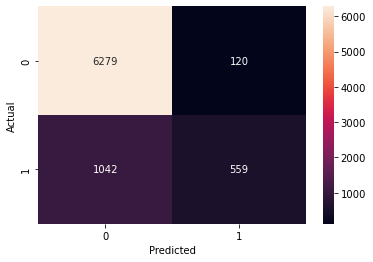

In [30]:
sns.heatmap(cm_train,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
cm_test =confusion_matrix(y_test,pred_data_test)

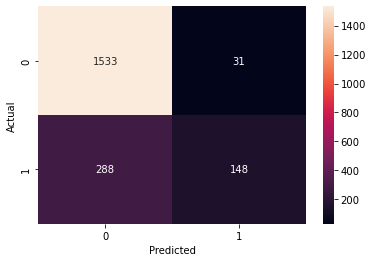

In [32]:
sns.heatmap(cm_test,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()